In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("./dataset"))

In [3]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.python.framework import ops
import math
import glob
import imageio
import pathlib
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.


In [4]:
train_data_dir = './cbsd_train2'
validation_data_dir = './dataset/'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16
img_width, img_height = 500, 500

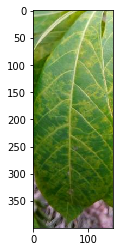

In [5]:
from imutils import paths
#อิมพอร์ต paths จาก imutils
image_paths = list(paths.list_images(train_data_dir))
#อ่านรูปาภาพสัตว์ทั้งหมดจากโฟลเดอร์
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#หลังจากอ่านมาเสร็จแล้ว เราต้องแปลงสีก่อนเพราะ cv2 นั้นเมื่ออ่านรูปเข้ามา จะมีค่าพื้นฐานของสีเป็น BGR ซึ่งสีที่เราใช้ๆกันอยู่อย่างคุ้นตาคือ RGB เพราะฉะนั้นเราต้องแปลงก่อน
plt.figure()
#เราใช้ pyplot ในการโชว์รูปขึ้นมา แต่ก่อนที่เราจะโชว์ขึ้นมาได้เราต้องสร้างตัว figure ขึ้นมาเสียก่อน เหมือนกับการสร้างหน้าต่างโปรแกรมขึ้นมาเพื่อที่จะให้เอารูปที่จะโชว์ไปแปะ
plt.imshow(new_image)
#ใช้ฟังก์ชั่น imshow ในการโชว์รูปออกมา

In [6]:
import random

random.shuffle(image_paths)

data = []
labels = []

for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    labels.append(image_path.split('\\')[1])
    data.append(image)

In [7]:
from sklearn.preprocessing import LabelBinarizer
data = np.array(data)
lb = LabelBinarizer()
data = data/255.0

#labels = np.array(labels)
#labels = lb.fit_transform(labels)
print(labels)

['cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd', 'cbsd', 'not_cbsd', 'not_cbsd',

In [8]:
for i in range(len(labels)) :
    if(labels[i] == 'cbsd'):
        labels[i] = [1,0]
    else:
        labels[i] = [0,1]
    print(labels[i])


[1, 0]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[1, 0]
[0, 1]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
[0, 1]
[0, 1]

In [10]:
labels = np.array(labels)
labels = lb.fit_transform(labels)
print(labels)
print(len(labels))

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]
1013


In [9]:
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Flatten
from keras import optimizers
#อิมพอร์ตพวกของต่างๆที่จะต้องใช้จาก keras
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)
#เรียกใช้ฟังก์ชั่น train_test_split เพื่อทำการสร้างข้อมูลเทรนกับเทส
model_2 = Sequential()
model_2.add(Conv2D(256, (3, 3), input_shape=(256, 256 ,3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Flatten())
model_2.add(Dense(2, activation='softmax'))
optimizer = optimizers.adam(lr=1e-1)
model_2.compile(loss='binary_crossentropy', optimizer=optimizer)
model_2.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 256)     590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 256)     590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       295040    
_________________________________________________________________
conv

In [10]:
model_2.fit(X_train, y_train, epochs=10, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 384 samples, validate on 96 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[32,256,256,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node training/Adam/gradients/max_pooling2d_1/MaxPool_grad/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [116]:
y_pred = model_2.predict(X_test)
target_names = ['health_train','not_health_train']
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))



0.775
                  precision    recall  f1-score   support

    health_train       0.72      0.86      0.78        56
not_health_train       0.85      0.70      0.77        64

        accuracy                           0.78       120
       macro avg       0.78      0.78      0.77       120
    weighted avg       0.79      0.78      0.77       120

